In [105]:
import pandas as pd
import matplotlib.pyplot as plt


In [106]:
dataf=pd.read_excel('FlightPrice_pred.xlsx')

In [107]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [108]:
dataf.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [109]:
dataf.dropna(inplace=True)

In [110]:
dataf.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [111]:
dataf.drop(["Additional_Info"], axis=1, inplace=True)

In [112]:
dataf["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [113]:
dataf["Journey_day"] = pd.to_datetime(dataf.Date_of_Journey, format="%d/%m/%Y").dt.day

In [114]:
dataf["Journey_month"] = pd.to_datetime(dataf.Date_of_Journey, format="%d/%m/%Y").dt.month

In [115]:
dataf.drop(["Date_of_Journey"], axis=1, inplace=True)

In [116]:
dataf["Dep_hour"] = pd.to_datetime(dataf["Dep_Time"]).dt.hour


In [117]:
dataf["Dep_min"] = pd.to_datetime(dataf["Dep_Time"]).dt.minute


In [118]:
dataf.drop(["Dep_Time"], axis=1, inplace=True)

In [119]:
dataf["Arr_hour"] = pd.to_datetime(dataf["Arrival_Time"]).dt.hour


In [120]:
dataf["Arr_min"] = pd.to_datetime(dataf["Arrival_Time"]).dt.minute


In [121]:
dataf.drop(["Arrival_Time"], axis=1, inplace=True)

In [122]:
duration = list(dataf["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [123]:

dataf["Duration_hours"] = duration_hours
dataf["Duration_mins"] = duration_mins


In [124]:
dataf.drop(["Duration"], axis = 1, inplace = True)

In [125]:
dataf.drop(["Route"], axis=1, inplace=True)

Categorical Data


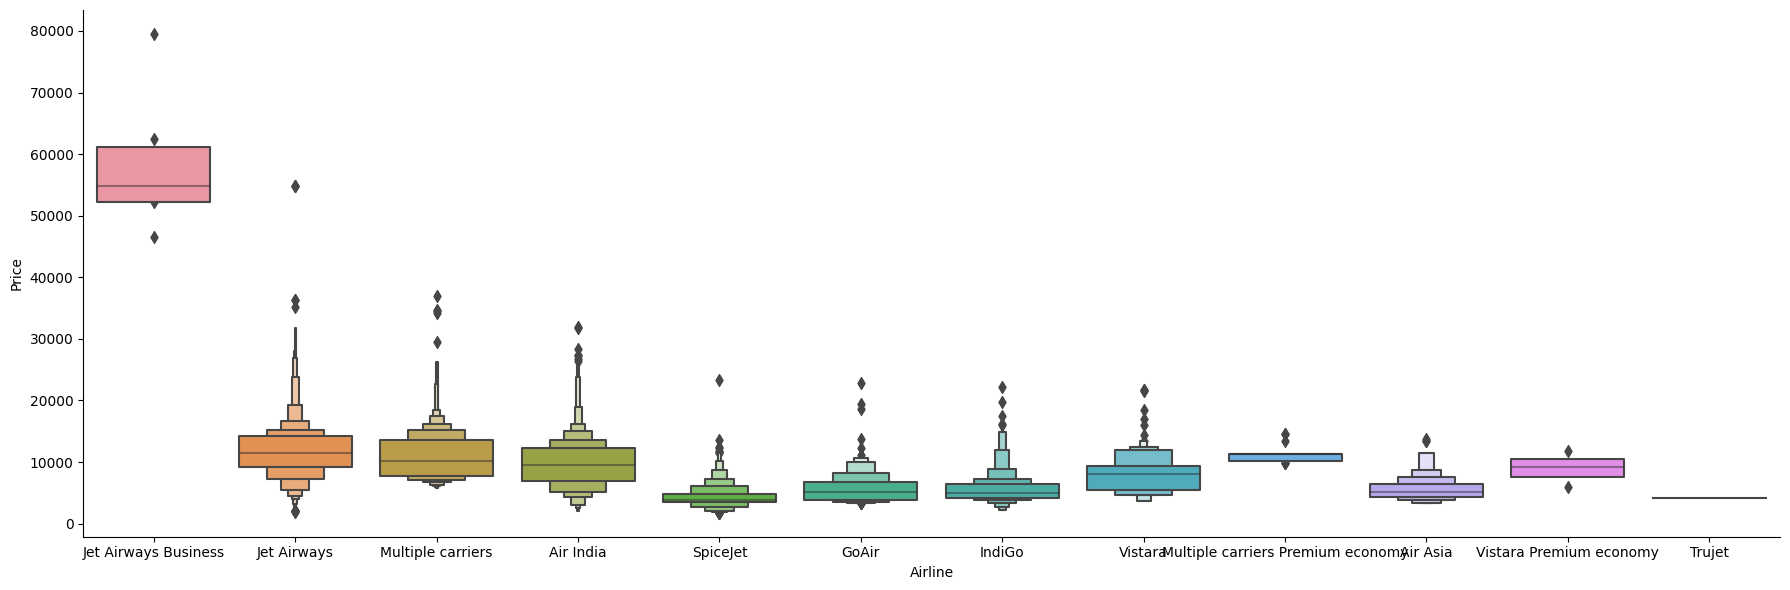

In [126]:
import seaborn as sns
sns.catplot(y = "Price", x = "Airline", data = dataf.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [127]:
dataf.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [128]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = dataf.Airline

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [129]:

Source = dataf.Source

Source = pd.get_dummies(Source, prefix="Arriv", drop_first= True)

Source.head()

,Arriv_Chennai,Arriv_Delhi,Arriv_Kolkata,Arriv_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [130]:
Destination = dataf.Destination

Destination = pd.get_dummies(Destination, prefix="Dest", drop_first= True)

Destination.head()

,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,Dest_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [131]:
Destination.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Dest_Cochin     10682 non-null  uint8
 1   Dest_Delhi      10682 non-null  uint8
 2   Dest_Hyderabad  10682 non-null  uint8
 3   Dest_Kolkata    10682 non-null  uint8
 4   Dest_New Delhi  10682 non-null  uint8
dtypes: uint8(5)
memory usage: 135.6 KB


In [132]:
dataf.Total_Stops.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


In [133]:
train_data=pd.concat([dataf, Destination, Source, Airline],axis=1)

In [134]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Airline                            10682 non-null  object
 1   Source                             10682 non-null  object
 2   Destination                        10682 non-null  object
 3   Total_Stops                        10682 non-null  int64 
 4   Price                              10682 non-null  int64 
 5   Journey_day                        10682 non-null  int64 
 6   Journey_month                      10682 non-null  int64 
 7   Dep_hour                           10682 non-null  int64 
 8   Dep_min                            10682 non-null  int64 
 9   Arr_hour                           10682 non-null  int64 
 10  Arr_min                            10682 non-null  int64 
 11  Duration_hours                     10682 non-null  int64 
 12  Dura

In [135]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,1,0,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,1,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,1,0,0,0,0,0,0,0,0


In [136]:
train_data.drop(["Destination"], axis=1, inplace=True)

In [140]:
train_data.drop(["Airline"], axis=1, inplace=True)

In [141]:
train_data.drop(["Source"], axis=1, inplace=True)

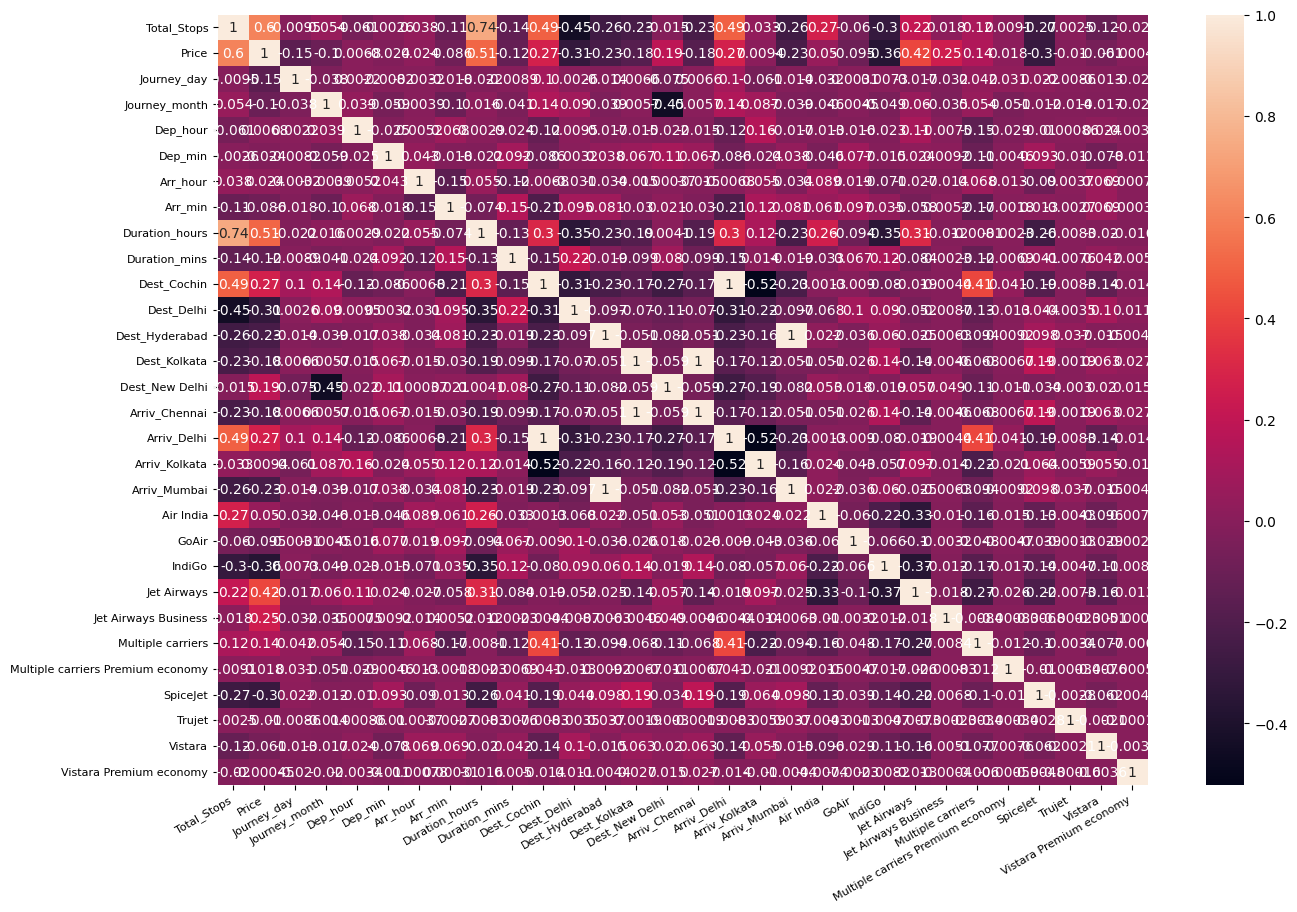

In [142]:
# Correlation Matrix
cor_fig, cor_ax = plt.subplots(figsize=(15, 10))
corr_matrix = train_data.corr()
cor_ax = sns.heatmap(corr_matrix, annot=True)
plt.xticks(rotation=30, horizontalalignment='right', fontsize=8)
plt.yticks(fontsize=8)

plt.show()

In [143]:
train_data_copy= train_data.copy()

In [144]:
train_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Total_Stops                        10682 non-null  int64
 1   Price                              10682 non-null  int64
 2   Journey_day                        10682 non-null  int64
 3   Journey_month                      10682 non-null  int64
 4   Dep_hour                           10682 non-null  int64
 5   Dep_min                            10682 non-null  int64
 6   Arr_hour                           10682 non-null  int64
 7   Arr_min                            10682 non-null  int64
 8   Duration_hours                     10682 non-null  int64
 9   Duration_mins                      10682 non-null  int64
 10  Dest_Cochin                        10682 non-null  uint8
 11  Dest_Delhi                         10682 non-null  uint8
 12  Dest_Hyderabad    

In [145]:
feature_scale=[feature for feature in train_data.columns if feature not in ['Price']]

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scalled=scaler.fit_transform(train_data[feature_scale])

In [146]:
print(scalled)

[[-1.22066609  1.23728754 -1.46740227 ... -0.00967596 -0.21667251
  -0.01676082]
 [ 1.74143186 -1.47530729  0.25028893 ... -0.00967596 -0.21667251
  -0.01676082]
 [ 1.74143186 -0.53179604  1.10913453 ... -0.00967596 -0.21667251
  -0.01676082]
 ...
 [-1.22066609  1.59110426 -0.60855667 ... -0.00967596 -0.21667251
  -0.01676082]
 [-1.22066609 -1.47530729 -1.46740227 ... -0.00967596  4.61526016
  -0.01676082]
 [ 1.74143186 -0.53179604  0.25028893 ... -0.00967596 -0.21667251
  -0.01676082]]


In [147]:
 dataset_scaled=pd.DataFrame(scalled, columns=feature_scale)

In [148]:
dataset_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total_Stops                        10682 non-null  float64
 1   Journey_day                        10682 non-null  float64
 2   Journey_month                      10682 non-null  float64
 3   Dep_hour                           10682 non-null  float64
 4   Dep_min                            10682 non-null  float64
 5   Arr_hour                           10682 non-null  float64
 6   Arr_min                            10682 non-null  float64
 7   Duration_hours                     10682 non-null  float64
 8   Duration_mins                      10682 non-null  float64
 9   Dest_Cochin                        10682 non-null  float64
 10  Dest_Delhi                         10682 non-null  float64
 11  Dest_Hyderabad                     10682 non-null  flo

In [149]:
X=dataset_scaled

In [150]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total_Stops                        10682 non-null  float64
 1   Journey_day                        10682 non-null  float64
 2   Journey_month                      10682 non-null  float64
 3   Dep_hour                           10682 non-null  float64
 4   Dep_min                            10682 non-null  float64
 5   Arr_hour                           10682 non-null  float64
 6   Arr_min                            10682 non-null  float64
 7   Duration_hours                     10682 non-null  float64
 8   Duration_mins                      10682 non-null  float64
 9   Dest_Cochin                        10682 non-null  float64
 10  Dest_Delhi                         10682 non-null  float64
 11  Dest_Hyderabad                     10682 non-null  flo

In [151]:
y=train_data_copy["Price"]

In [152]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [154]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [155]:
y_pred = reg_rf.predict(X_test)


In [156]:
from sklearn.metrics import r2_score
score2_rf = r2_score(y_test,y_pred)

In [158]:
print(score2_rf)

0.8186402223488514


In [159]:
reg_rf.score(X_test, y_test)

0.8186402223488514

C:\Users\shaha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


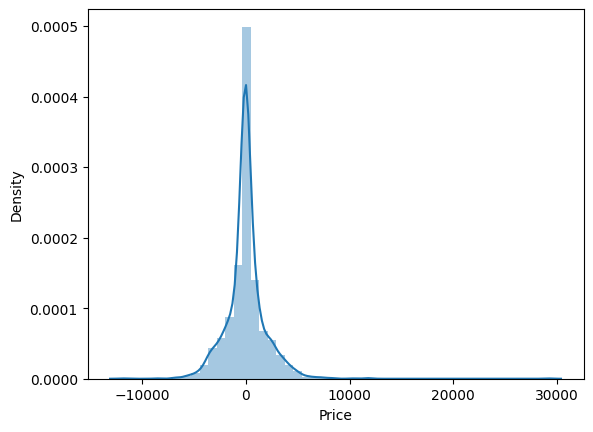

In [160]:
sns.distplot(y_test-y_pred)
plt.show()

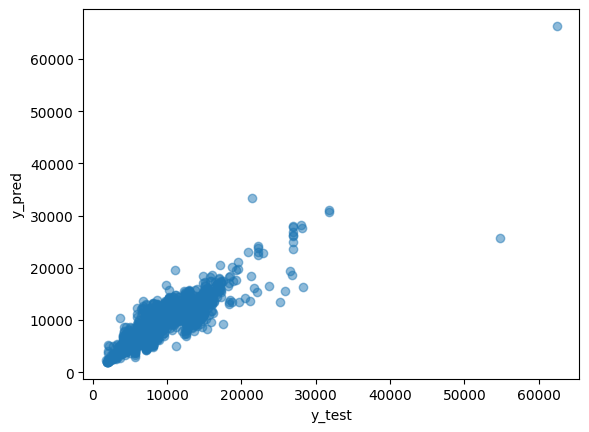

In [161]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [163]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1203.1784485789779
MSE: 3832957.1934721824
RMSE: 1957.793960934649
